# Pima Indians Diabetes Database

This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. The objective of the dataset is to diagnostically predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset. Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here are females at least 21 years old of Pima Indian heritage.

* This tutorial is highly recommended for beginners.
* This is my fourth notebook. Do point out my mistakes in comment section.
* I achieved accuracy 77% on test data.
* If you find my work interesting, do upvote it.

This is default first cell in any kaggle kernel. They import NumPy and Pandas libraries and it also lists the available Kernel files. NumPy is the fundamental package for scientific computing with Python. Pandas is the most popular python library that is used for data analysis.

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/pima-indians-diabetes-database/diabetes.csv


# Importing Necessary Libraries

In [2]:
# Plotting Libraries

import matplotlib.pyplot as plt
import seaborn as sns
import cufflinks as cf
%matplotlib inline

# Metrics for Classification technique

from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

# Scaler

from sklearn.preprocessing import RobustScaler, StandardScaler

# Cross Validation

from sklearn.model_selection import KFold, cross_val_score, GridSearchCV, RandomizedSearchCV, train_test_split

# Linear Models

from sklearn.linear_model import LogisticRegression

# Ensemble Technique

from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier

# Other model

from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

# Model Stacking 

from mlxtend.classifier import StackingCVClassifier

# Other libraries

from datetime import datetime
from scipy.stats import skew
from scipy.special import boxcox1p
from scipy.stats import boxcox_normmax
from sklearn.impute import SimpleImputer
from numpy import nan
from scipy.stats import randint as sp_randint
from scipy.stats import uniform as sp_uniform

# Loading Dataset

Our first step is to extract data. We will be extracting data using pandas function read_csv. Specify the location to the dataset and import them.

In [3]:
data = pd.read_csv("../input/pima-indians-diabetes-database/diabetes.csv")
data.head(6) # Mention no of rows to be displayed from the top in the argument

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0


# Exploring Dataset

In [4]:
# Shape of the dataset

data.shape

(768, 9)

**There are 768 rows and 9 columns in the dataset.**

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


**There are no missing values in the dataset. Two columns are of float type and rest are int type.**

In [6]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


# EDA

**Let's check the correlation between the features.**

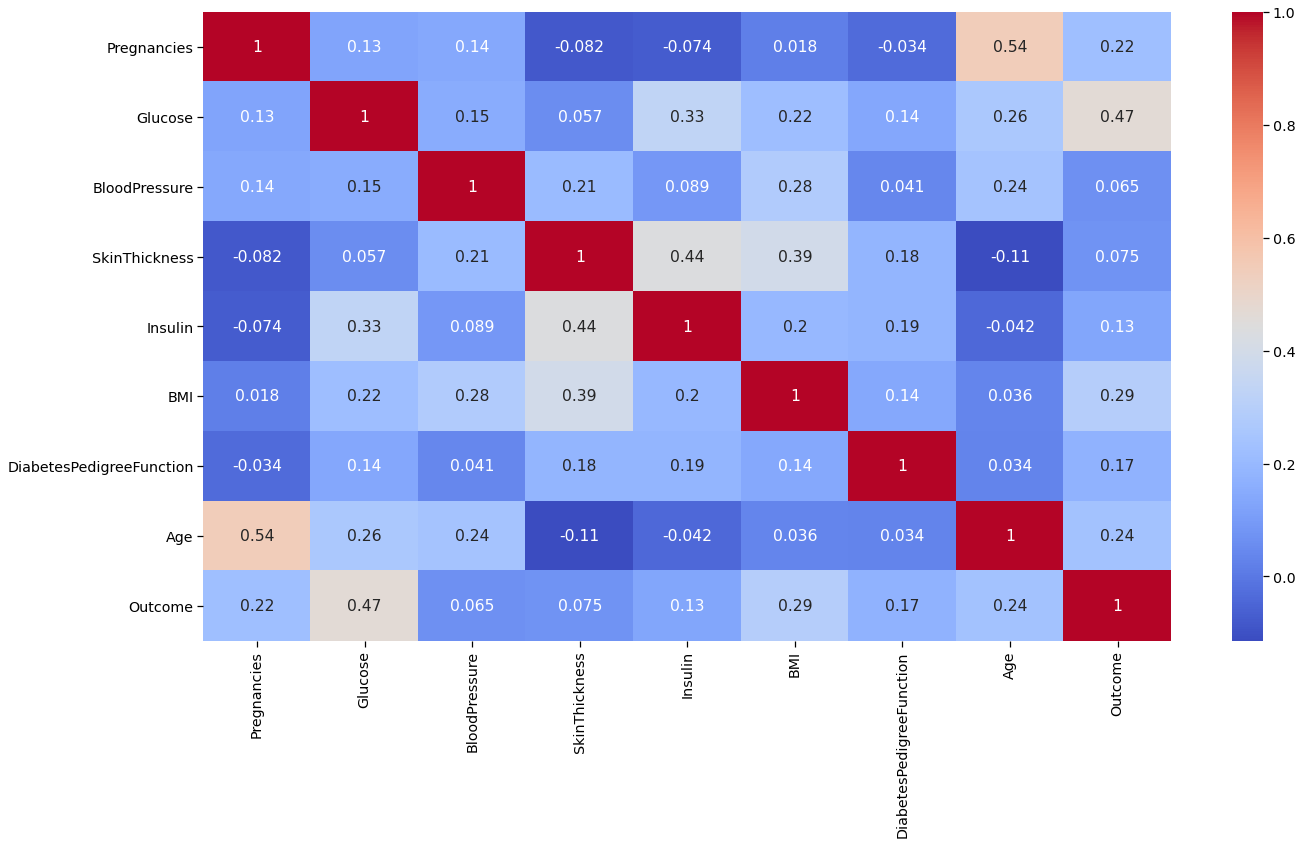

In [7]:
plt.figure(figsize=(20,12))
sns.set_context('notebook',font_scale = 1.3)
sns.heatmap(data.corr(),annot=True,cmap='coolwarm')
plt.tight_layout()

**Let's check whether the dependent variable is balanced or not.**

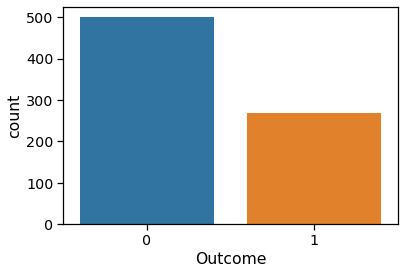

In [8]:
sns.countplot(x=data['Outcome'],data = data)

**It looks like ratio between negative and positive patients is approx 2:1 and actually this is not imbalanced dataset as we have enough values for both 0 and 1.**

# Feature Engineering

In [9]:
X = data.drop('Outcome',axis = 1)
y = data['Outcome']


In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state=42)

**Checking for zero values.**

In [11]:
print("total number of rows : {0}".format(len(data)))
print("number of rows missing glucose_conc: {0}".format(len(data.loc[data['Glucose'] == 0])))
print("number of rows missing diastolic_bp: {0}".format(len(data.loc[data['BloodPressure'] == 0])))
print("number of rows missing insulin: {0}".format(len(data.loc[data['Insulin'] == 0])))
print("number of rows missing bmi: {0}".format(len(data.loc[data['BMI'] == 0])))
print("number of rows missing diab_pred: {0}".format(len(data.loc[data['DiabetesPedigreeFunction'] == 0])))
print("number of rows missing age: {0}".format(len(data.loc[data['Age'] == 0])))

total number of rows : 768
number of rows missing glucose_conc: 5
number of rows missing diastolic_bp: 35
number of rows missing insulin: 374
number of rows missing bmi: 11
number of rows missing diab_pred: 0
number of rows missing age: 0


In [12]:
# Filling Zero values

fill_values = SimpleImputer(missing_values=0, strategy="mean")

X_train = fill_values.fit_transform(X_train)
X_test = fill_values.fit_transform(X_test)

# Modelling and Stacking 

In [13]:
# RandomForestClassifier

random_forest_model = RandomForestClassifier(random_state = 42)

random_forest_model.fit(X_train, y_train.ravel())

RandomForestClassifier(random_state=42)

In [14]:
predict_train_data = random_forest_model.predict(X_test)

print("Accuracy = {0:.3f}".format(accuracy_score(y_test, predict_train_data)))

Accuracy = 0.740


In [15]:
## Hyperparameter Optimzation

params1={
    
    "n_estimators" : [100, 300, 500, 800, 1200], 
    "max_depth" : [5, 8, 15, 25, 30],
    "min_samples_split" : [2, 5, 10, 15, 100],
    "min_samples_leaf" : [1, 2, 5, 10] 

}

In [16]:
rfm = RandomForestClassifier(random_state = 42)

In [17]:
rfms = RandomizedSearchCV(rfm,param_distributions=params1,n_iter=5,scoring='roc_auc',n_jobs=-1,cv=5,verbose=3)

In [18]:
def timer(start_time=None):
    if not start_time:
        start_time = datetime.now()
        return start_time
    elif start_time:
        thour, temp_sec = divmod((datetime.now() - start_time).total_seconds(), 3600)
        tmin, tsec = divmod(temp_sec, 60)
        print('\n Time taken: %i hours %i minutes and %s seconds.' % (thour, tmin, round(tsec, 2)))

In [19]:
# Here we go
start_time = timer(None) # timing starts from this point for "start_time" variable
rfms.fit(X_train,y_train.ravel())
timer(start_time) # timing ends here for "start_time" variable

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:   16.3s finished



 Time taken: 0 hours 0 minutes and 18.21 seconds.


In [20]:
rfms.best_estimator_

RandomForestClassifier(max_depth=5, min_samples_split=5, n_estimators=800,
                       random_state=42)

In [21]:
model1 = RandomForestClassifier(max_depth=8, min_samples_split=10, n_estimators=500,
                       random_state=42)

In [22]:
model1.fit(X_train,y_train)
y_pred1 = model1.predict(X_test)

In [23]:
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))

0.7619047619047619
[[122  29]
 [ 26  54]]


**So after doing Hyperparameter optimization, we are able to achieve accuracy of 76% approx through RandomForestClassifier model. Let's try XGBoost Classifier.**

In [24]:
model2 = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [25]:
model2.fit(X_train,y_train.ravel())
y_pred2 = model2.predict(X_test)

In [26]:
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))

0.7316017316017316
[[115  36]
 [ 26  54]]


**So after doing Hyperparameter optimization, we are able to achieve accuracy of 73% approx through XGBoost Classifier. Let's try CatBoostClassifier.**

In [27]:
model3 = CatBoostClassifier()

In [28]:
model3.fit(X_train,y_train)
y_pred3 = model3.predict(X_test)

Learning rate set to 0.0079
0:	learn: 0.6878157	total: 54.2ms	remaining: 54.1s
1:	learn: 0.6836513	total: 55.8ms	remaining: 27.8s
2:	learn: 0.6798131	total: 57.3ms	remaining: 19s
3:	learn: 0.6757720	total: 58.8ms	remaining: 14.6s
4:	learn: 0.6715678	total: 60.2ms	remaining: 12s
5:	learn: 0.6670349	total: 61.8ms	remaining: 10.2s
6:	learn: 0.6630802	total: 63.1ms	remaining: 8.96s
7:	learn: 0.6590646	total: 64.5ms	remaining: 8s
8:	learn: 0.6548442	total: 65.9ms	remaining: 7.25s
9:	learn: 0.6511888	total: 67.2ms	remaining: 6.66s
10:	learn: 0.6474425	total: 68.6ms	remaining: 6.17s
11:	learn: 0.6442680	total: 70ms	remaining: 5.77s
12:	learn: 0.6409295	total: 71.5ms	remaining: 5.43s
13:	learn: 0.6372070	total: 72.9ms	remaining: 5.13s
14:	learn: 0.6335462	total: 74.3ms	remaining: 4.88s
15:	learn: 0.6292170	total: 75.6ms	remaining: 4.65s
16:	learn: 0.6254834	total: 77.1ms	remaining: 4.46s
17:	learn: 0.6224791	total: 78.4ms	remaining: 4.28s
18:	learn: 0.6186041	total: 79.8ms	remaining: 4.12s
19:

In [29]:
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))

0.7532467532467533
[[122  29]
 [ 28  52]]


**So after doing Hyperparameter optimization, we are able to achieve accuracy of 75% approx through CatBoostClassifier. Let's try SVC.**

In [30]:
params4 = {'C': [0.1, 1, 10, 100, 1000],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'kernel': ['rbf']} 

In [31]:
svcs = RandomizedSearchCV(SVC(),param_distributions=params4,n_iter=5,scoring='roc_auc',n_jobs=-1,cv=5,verbose=3)

In [32]:
# Here we go
start_time = timer(None) # timing starts from this point for "start_time" variable
svcs.fit(X_train,y_train.ravel())
timer(start_time) # timing ends here for "start_time" variable

Fitting 5 folds for each of 5 candidates, totalling 25 fits

 Time taken: 0 hours 0 minutes and 0.16 seconds.


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 out of  25 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:    0.1s finished


In [33]:
svcs.best_estimator_

SVC(C=1, gamma=0.0001)

In [34]:
model4 = SVC(C=0.1, gamma=0.001)

In [35]:
model4.fit(X_train,y_train)
y_pred4 = model4.predict(X_test)

In [36]:
print(accuracy_score(y_test,y_pred4))
print(confusion_matrix(y_test,y_pred4))

0.7012987012987013
[[144   7]
 [ 62  18]]


**So after doing Hyperparameter optimization, we are able to achieve accuracy of 70% approx through SVC. Let's try AdaBoost Classifier.**

In [37]:
params5 = {'n_estimators':[500,1000,2000],'learning_rate':[.001,0.01,.1]}

In [38]:
adas = RandomizedSearchCV(AdaBoostClassifier(),param_distributions=params5,n_iter=5,scoring='roc_auc',n_jobs=-1,cv=5,verbose=3)

In [39]:
# Here we go
start_time = timer(None) # timing starts from this point for "start_time" variable
adas.fit(X_train,y_train.ravel())
timer(start_time) # timing ends here for "start_time" variable

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:   30.4s finished



 Time taken: 0 hours 0 minutes and 35.01 seconds.


In [40]:
adas.best_estimator_

AdaBoostClassifier(learning_rate=0.01, n_estimators=2000)

In [41]:
model5 = AdaBoostClassifier(learning_rate=0.01, n_estimators=500)

In [42]:
model5.fit(X_train,y_train)
y_pred5 = model5.predict(X_test)

In [43]:
print(accuracy_score(y_test,y_pred5))
print(confusion_matrix(y_test,y_pred5))

0.7662337662337663
[[133  18]
 [ 36  44]]


**So after doing Hyperparameter optimization, we are able to achieve accuracy of 77% approx through AdaBoost Classifier. Let's try LightGBM Classifier.**

In [44]:
params6 = {
    'learning_rate': [ 0.1],
    'num_leaves': [31],
    'boosting_type' : ['gbdt'],
    'objective' : ['binary']
}

In [45]:
lgbs = RandomizedSearchCV(LGBMClassifier(),param_distributions=params6,n_iter=5,scoring='roc_auc',n_jobs=-1,cv=5,verbose=3)

In [46]:
# Here we go
start_time = timer(None) # timing starts from this point for "start_time" variable
lgbs.fit(X_train,y_train.ravel())
timer(start_time) # timing ends here for "start_time" variable

/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_search.py:282: UserWarning:

The total space of parameters 1 is smaller than n_iter=5. Running 1 iterations. For exhaustive searches, use GridSearchCV.

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 5 folds for each of 1 candidates, totalling 5 fits

 Time taken: 0 hours 0 minutes and 0.64 seconds.


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    0.6s remaining:    0.8s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.6s finished


In [47]:
lgbs.best_estimator_

LGBMClassifier(objective='binary')

In [48]:
model6 = LGBMClassifier(objective='binary')

In [49]:
model6.fit(X_train,y_train)
y_pred6 = model6.predict(X_test)

In [50]:
print(accuracy_score(y_test,y_pred6))
print(confusion_matrix(y_test,y_pred6))

0.7402597402597403
[[116  35]
 [ 25  55]]


**So after doing Hyperparameter optimization, we are able to achieve accuracy of 74% approx through LightGBM Classifier. Let's try GradientBoostingClassifier.**

In [51]:
model7 = GradientBoostingClassifier(random_state = 42)

In [52]:
model7.fit(X_train,y_train)
y_pred7 = model7.predict(X_test)

In [53]:
print(accuracy_score(y_test,y_pred7))
print(confusion_matrix(y_test,y_pred7))

0.7359307359307359
[[116  35]
 [ 26  54]]


**So after doing Hyperparameter optimization, we are able to achieve accuracy of 74% approx through GradientBoostingClassifier. Now let's try stacking of models.**

In [54]:
## Stacking of Models

model8 = StackingCVClassifier(classifiers=[model1,model2,model3,model5,model6,model7],
                            meta_classifier=model1,
                            random_state=42)

In [55]:
model8.fit(X_train,y_train.ravel())

Learning rate set to 0.005871
0:	learn: 0.6899324	total: 2.62ms	remaining: 2.62s
1:	learn: 0.6871131	total: 5.02ms	remaining: 2.5s
2:	learn: 0.6845103	total: 7.44ms	remaining: 2.47s
3:	learn: 0.6817707	total: 9.82ms	remaining: 2.44s
4:	learn: 0.6773591	total: 12.2ms	remaining: 2.42s
5:	learn: 0.6745170	total: 14.6ms	remaining: 2.42s
6:	learn: 0.6713168	total: 17ms	remaining: 2.41s
7:	learn: 0.6678373	total: 19.4ms	remaining: 2.41s
8:	learn: 0.6648399	total: 21.8ms	remaining: 2.4s
9:	learn: 0.6620982	total: 24.3ms	remaining: 2.41s
10:	learn: 0.6588787	total: 27ms	remaining: 2.42s
11:	learn: 0.6559009	total: 29.7ms	remaining: 2.44s
12:	learn: 0.6532774	total: 32.3ms	remaining: 2.45s
13:	learn: 0.6498807	total: 35ms	remaining: 2.47s
14:	learn: 0.6467058	total: 37.7ms	remaining: 2.47s
15:	learn: 0.6437391	total: 40.2ms	remaining: 2.47s
16:	learn: 0.6412110	total: 42.9ms	remaining: 2.48s
17:	learn: 0.6387515	total: 45.6ms	remaining: 2.49s
18:	learn: 0.6354324	total: 48.3ms	remaining: 2.49s


StackingCVClassifier(classifiers=[RandomForestClassifier(max_depth=8,
                                                         min_samples_split=10,
                                                         n_estimators=500,
                                                         random_state=42),
                                  XGBClassifier(base_score=0.5,
                                                booster='gbtree',
                                                colsample_bylevel=1,
                                                colsample_bynode=1,
                                                colsample_bytree=1, gamma=0,
                                                gpu_id=-1,
                                                importance_type='gain',
                                                interaction_constraints='',
                                                learning_rate=0.300000012,
                                                max_delta_step=0, max_depth

In [56]:
y_pred8 = model8.predict(X_test)

In [57]:
print(accuracy_score(y_test,y_pred8))
print(confusion_matrix(y_test,y_pred8))

0.7748917748917749
[[133  18]
 [ 34  46]]


**After stacking the models, we are able to achieve accuracy of 76%. Highest so far is achieved by AdaBoost Classifier which is 77%.**

**Note : My next work will be on Malaria Dataset. My aim is to work on atleaat 5 disease dataset and then I will be creating Web app using Flask where user can check whether they are suffering from those diseases or not. After completing the web app, I will deploy it on Heroku and code can be accessed from GitHub.**

# Thank You!!